### Dataset: https://huggingface.co/datasets/formove-ai/physiomio

This page provides thorough explanation of the PhysioMio dataset and signal acquisition, as well as info on dataset variables.

Run `huggingface-cli download formove-ai/physiomio --repo-type dataset --local-dir physiomio` to download full data (4.42 GB)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### Loading and analyzing the data of paient1.

- Each of the 48 patients has their own files in physiomio/data
- Each patient file has a healthy_arm and impaired_arm folder
- There are 1-2 healthy_arm recording sessions and 1-12 impaired_arm recording sessions per patient
- Sampling rate is 2048 Hz, so sampling duration is 1/2048 (~0.5ms) per sample. 

In [ ]:
# Show structure of data directory
import seedir as sd

sd.seedir('../physiomio/data')

data/
├─patient10/
│ ├─impaired_arm/
│ │ ├─02.parquet
│ │ ├─03.parquet
│ │ ├─01.parquet
│ │ ├─08.parquet
│ │ ├─05.parquet
│ │ ├─04.parquet
│ │ ├─06.parquet
│ │ └─07.parquet
│ └─healthy_arm/
│   ├─02.parquet
│   └─01.parquet
├─patient6/
│ ├─impaired_arm/
│ │ ├─02.parquet
│ │ ├─03.parquet
│ │ ├─01.parquet
│ │ └─04.parquet
│ └─healthy_arm/
│   └─01.parquet
├─patient17/
│ ├─impaired_arm/
│ │ ├─12.parquet
│ │ ├─02.parquet
│ │ ├─03.parquet
│ │ ├─11.parquet
│ │ ├─01.parquet
│ │ ├─08.parquet
│ │ ├─09.parquet
│ │ ├─10.parquet
│ │ ├─05.parquet
│ │ ├─04.parquet
│ │ ├─06.parquet
│ │ └─07.parquet
│ └─healthy_arm/
│   ├─02.parquet
│   └─01.parquet
├─patient1/
│ ├─impaired_arm/
│ │ ├─02.parquet
│ │ ├─03.parquet
│ │ ├─01.parquet
│ │ ├─05.parquet
│ │ ├─04.parquet
│ │ └─06.parquet
│ └─healthy_arm/
│   ├─02.parquet
│   └─01.parquet
├─patient28/
│ ├─impaired_arm/
│ │ ├─02.parquet
│ │ ├─03.parquet
│ │ ├─01.parquet
│ │ ├─05.parquet
│ │ ├─04.parquet
│ │ ├─06.parquet
│ │ └─07.parquet
│ └─healthy_arm/
│   ├─02

In [ ]:
data = pd.read_parquet('../physiomio/data/patient1/impaired_arm/01.parquet')  # Load impaired arm data for patient 1

print(data.head())

     time  channel_01  channel_02  channel_03  channel_04  channel_05  \
0  0.0000    0.008647    0.016785    0.007121   -0.000509   -0.007121   
1  0.0005    0.004069    0.011698    0.004578    0.002035   -0.004069   
2  0.0010    0.000509    0.008138   -0.001526   -0.004069   -0.001017   
3  0.0015    0.010173    0.019836    0.010173    0.011190    0.010681   
4  0.0020    0.011190    0.021362    0.013733    0.013733    0.015259   

   channel_06  channel_07  channel_08  channel_09  ...  channel_57  \
0   -0.044759   -0.016785    0.011190    0.014242  ...    0.016276   
1   -0.033569   -0.008138    0.013224    0.006104  ...    0.006612   
2   -0.024414    0.001017    0.012716   -0.009664  ...   -0.001526   
3   -0.006612    0.014750    0.020854   -0.003052  ...    0.003560   
4   -0.001017    0.014242    0.014242   -0.008647  ...   -0.000509   

   channel_58  channel_59  channel_60  channel_61  channel_62  channel_63  \
0    0.011698   -0.004578    0.006104    0.018311    0.016785  

In [19]:
movement_type = data['movement_type']  # Movement labels 

print(f"Movements: {np.unique(movement_type)}")

Movements: ['DiameterGrasp' 'ForearmPronation' 'ForearmSupination' 'HookGrasp'
 'MassAdduction' 'MassExtension' 'MassFlexion' 'PinchGrasp'
 'PinchGraspMiddle' 'PinchGraspPinkie' 'PinchGraspRing' 'Rest'
 'SphereGrasp' 'ThumbAdduction' 'WristDorsiFlexion' 'WristVolarFlexion']


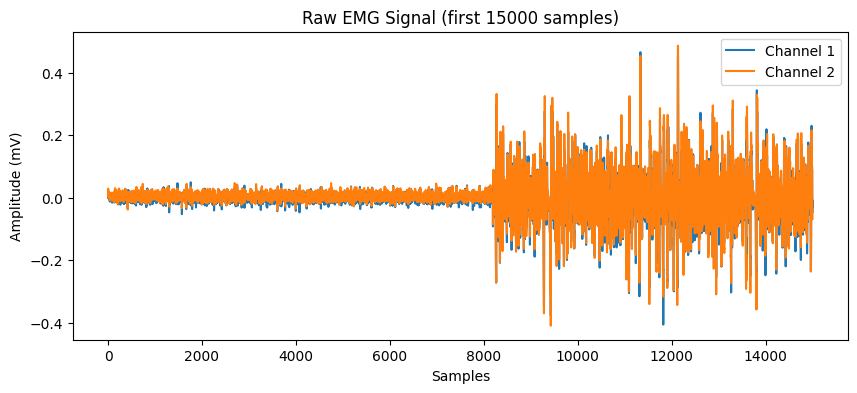

In [24]:
# Plotting sample emg
plt.figure(figsize=(10,4))
plt.plot(data[:15000]['channel_01'], label='Channel 1')
plt.plot(data[:15000]['channel_02'], label='Channel 2') # Note only used channel 1 and 2, there are 64 total 
plt.title("Raw EMG Signal (first 15000 samples)")
plt.xlabel("Samples")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.show()

Text(0, 0.5, 'Stimulus ID')

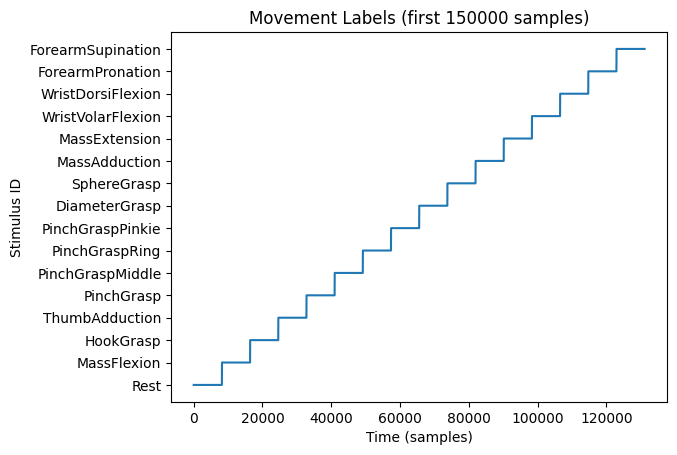

In [21]:
# Viewing transitions of movements over time
plt.plot(movement_type[:150000])
plt.title("Movement Labels (first 150000 samples)")
plt.xlabel("Time (samples)")
plt.ylabel("Stimulus ID")

### Label information
PhysioMio labels movements with string and no numerical IDs like Ninapro. To make the two datasets compatible, `mapping.py` includes a pre-mapping for PhysioMio strings to the int ID for the equivalent gesture in Ninapro. 

Three gestures in PhysioMio did not exist in Ninapro, so new IDs (50, 51, 52) were added to `mapping.py` as well.


| PhysioMio Gesture | Ninapro DB2 ID |
|---|---|
| Rest | 0 |
| MassFlexion | 6 |
| HookGrasp | 20 |
| ThumbAdduction | 34 |
| PinchGrasp | 15 |
| PinchGraspMiddle | 50 |
| PinchGraspRing | 51 |
| PinchGraspPinkie | 52 |
| DiameterGrasp | 19 |
| SphereGrasp | 27 |
| MassExtension | 8 |
| MassAdduction | 5 |
| WristVolarFlexion | 13 |
| WristDorsiFlexion | 14 |
| ForearmPronation | 11 |
| ForearmSupination | 12 |
